In [2]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [3]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import sys
from natsort import natsorted

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import ephys_functions as ephys

import importlib as imp
imp.reload(ephys);

In [4]:
def plot_full_experiment(file, excel, date, age, cell_num, smooth = False):
    '''
    Make all plots associated with a cell.
    '''
    
    #load excel sheet with information about traces
    wave_info = pd.read_excel(excel)
    
    #load csv of traces
    igor = pd.read_csv(file)

    all_waves = ephys.select_waves(igor, wave_info)
    processed_waves = ephys.process_waves(all_waves)
    if smooth:
        smoothed_waves = ephys.smooth(processed_waves)
        first_stim, second_stim, both_stim = ephys.divide_into_sections(smoothed_waves)
    
    else:
        first_stim, second_stim, both_stim = ephys.divide_into_sections(processed_waves)

    ephys.plot_all(both_stim, wave_info, date, age, cell_num)

    ephys.plot_max_SF(first_stim, both_stim, wave_info, date, age, cell_num)
    
    ephys.plot_SF(both_stim, wave_info, date, age, cell_num)

    cap_waves = ephys.find_cap_wave(all_waves)
    ephys.plot_max_SF(cap_waves, cap_waves, wave_info, date, age, cell_num)

    ephys.plot_inhibitory(first_stim, wave_info, date, age, cell_num)

## p14 cell 1 

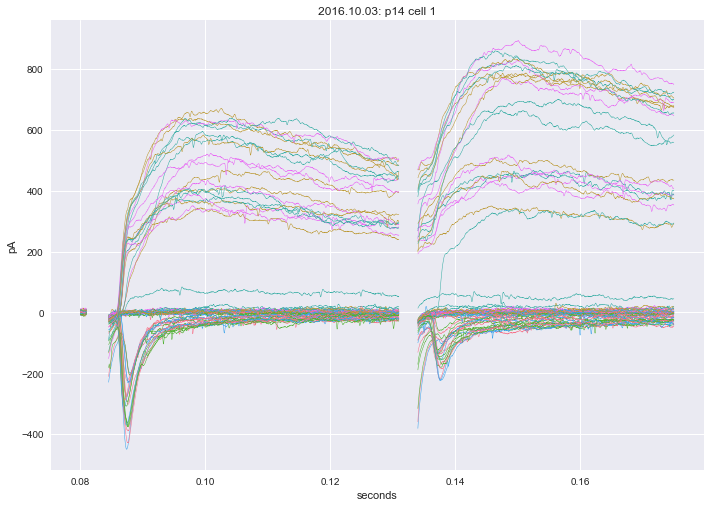

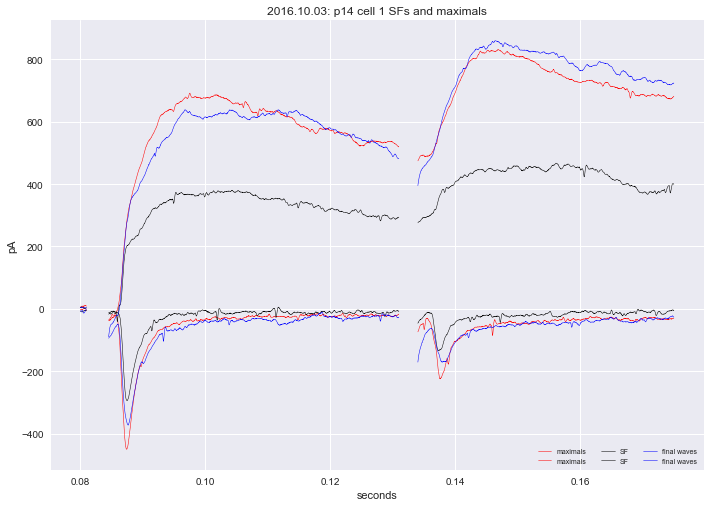

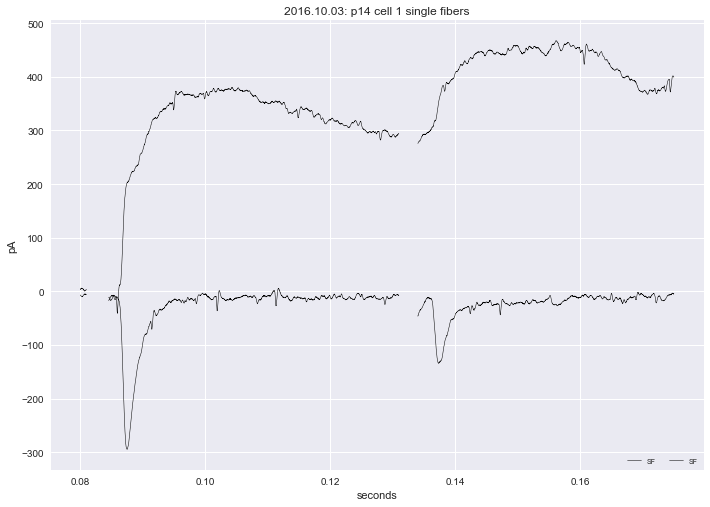

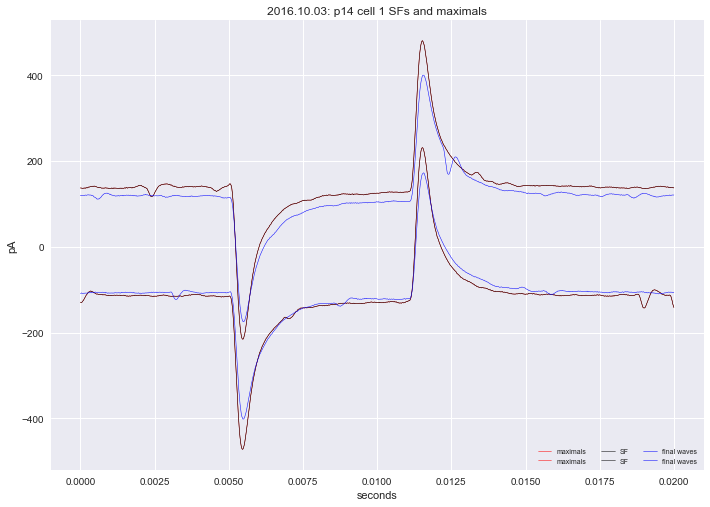

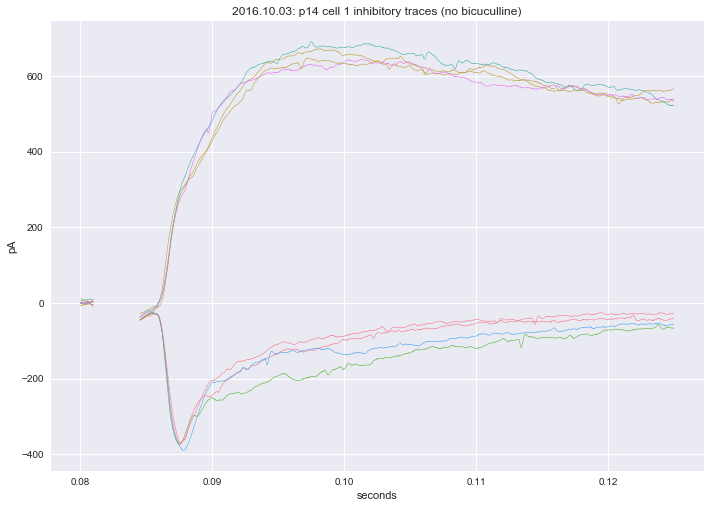

In [5]:
#files
file = '/Volumes/lab_data_2/2016.10.03.csv'
excel = '/Volumes/lab_data_2/2016.10.03_Cell1.xlsx'

#cell information
date = '2016.10.03'
age = 'p14'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)

## p15 cell 1

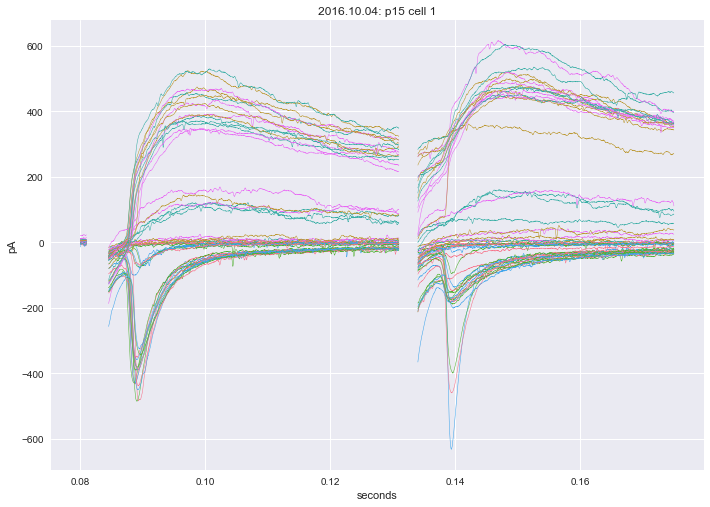

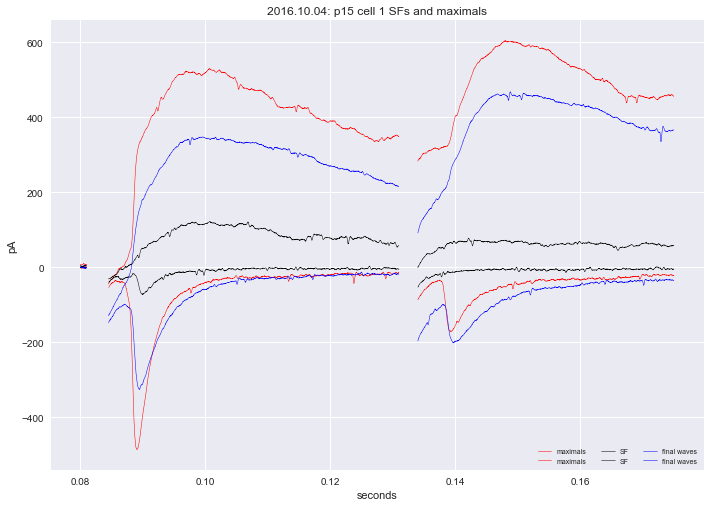

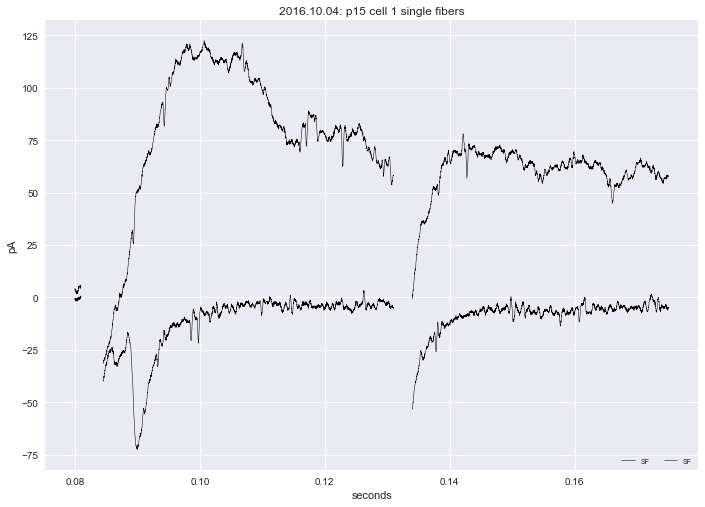

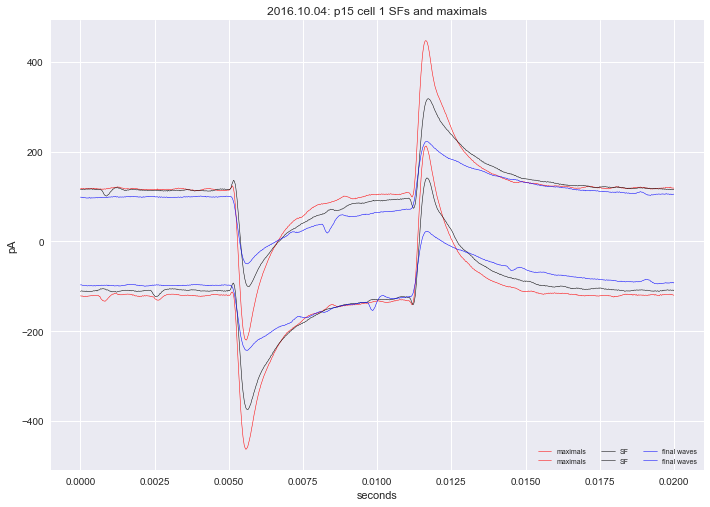

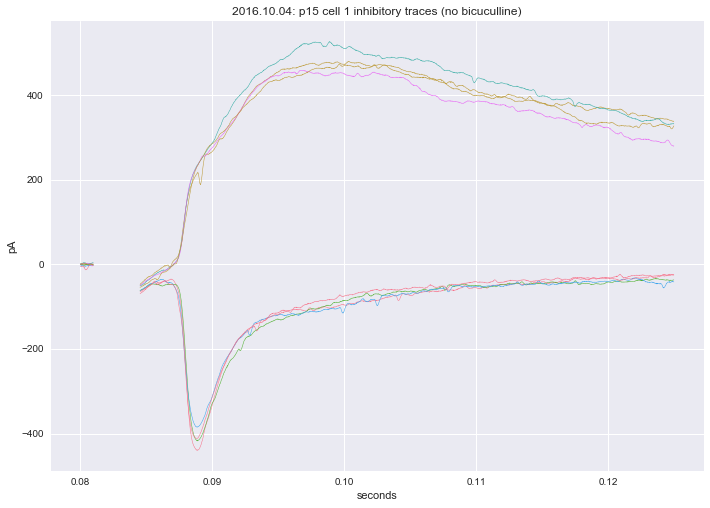

In [6]:
#files
file = '/Volumes/lab_data_2/2016.10.04.csv'
excel = '/Volumes/lab_data_2/2016.10.04_Cell1.xlsx'

#cell information
date = '2016.10.04'
age = 'p15'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)

## p15 cell 

no final maximals
no final maximals


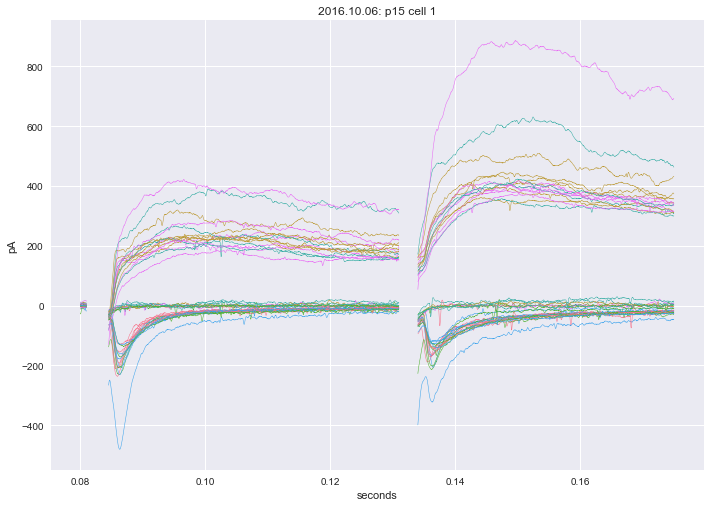

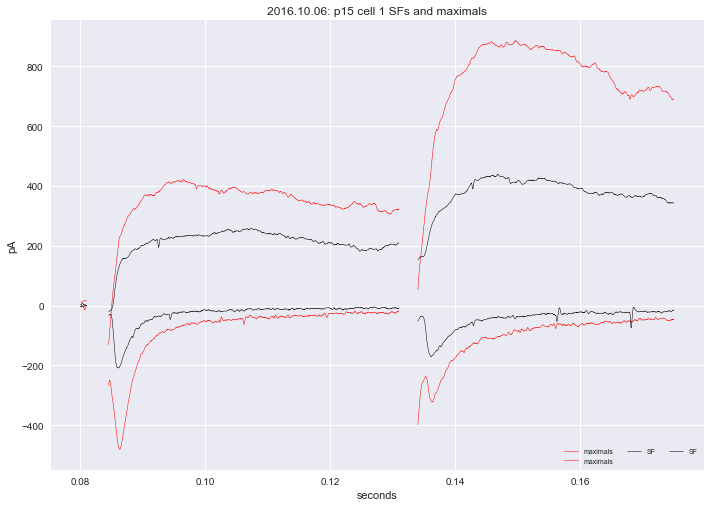

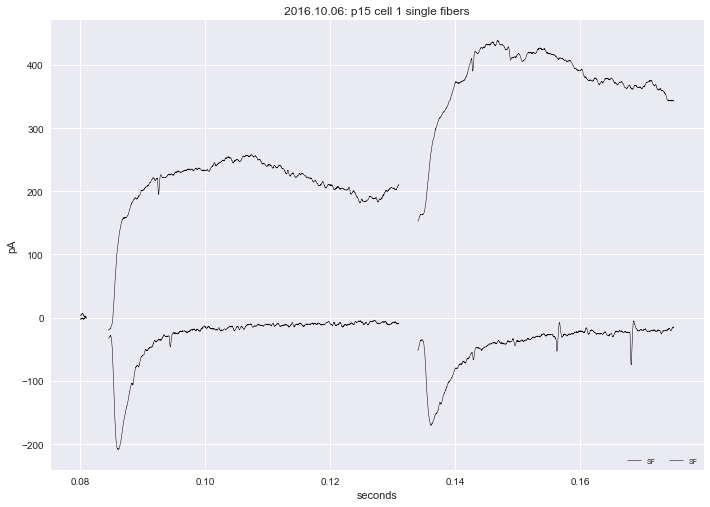

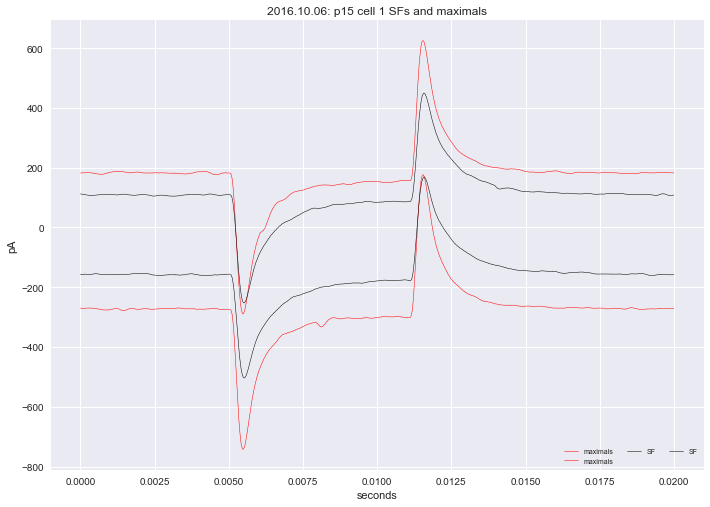

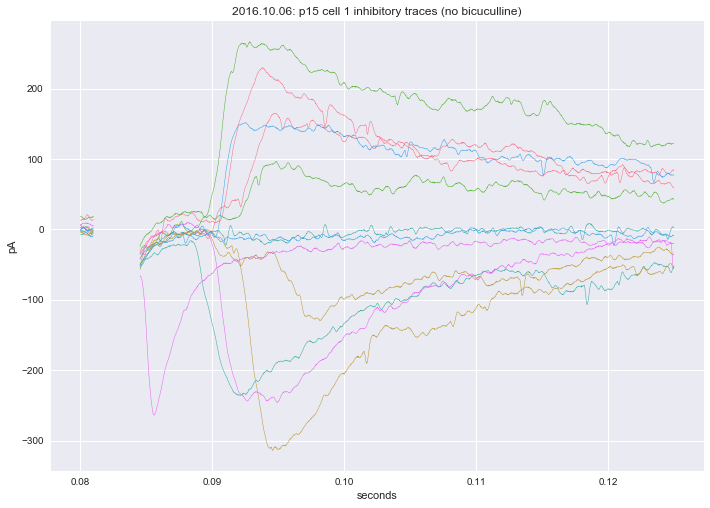

In [7]:
#files
file = '/Volumes/lab_data_2/2016.10.06.csv'
excel = '/Volumes/lab_data_2/2016.10.06_Cell1.xlsx'

#cell information
date = '2016.10.06'
age = 'p15'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)

## p18 cell, mouse 1 

no single fibers
no final maximals
no single fibers
no single fibers
no final maximals


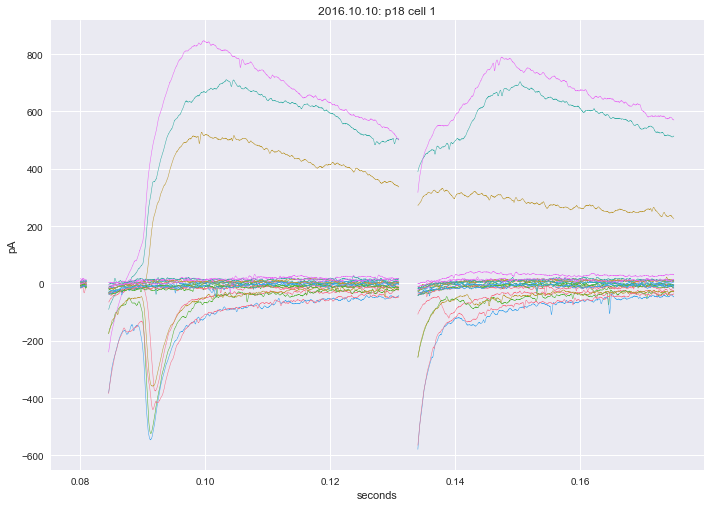

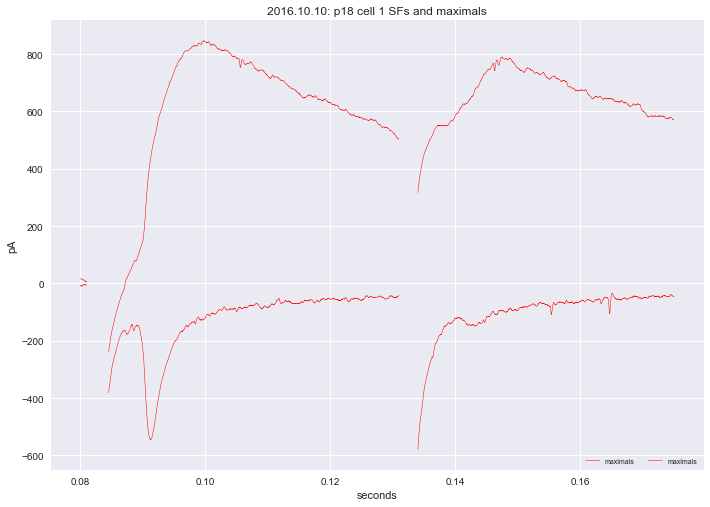

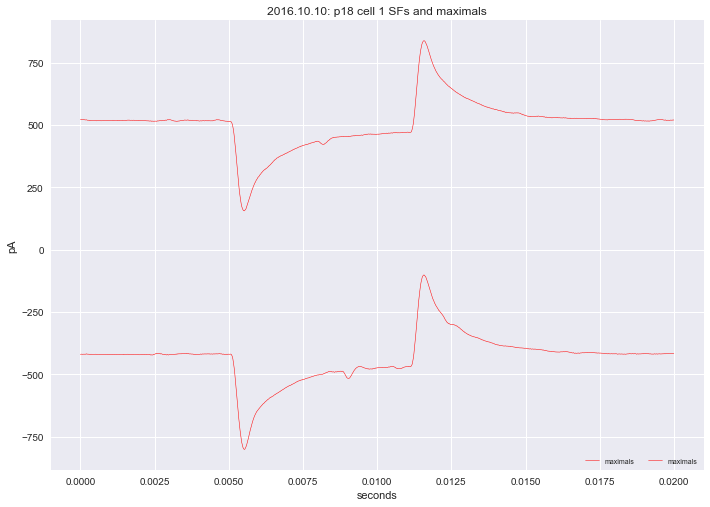

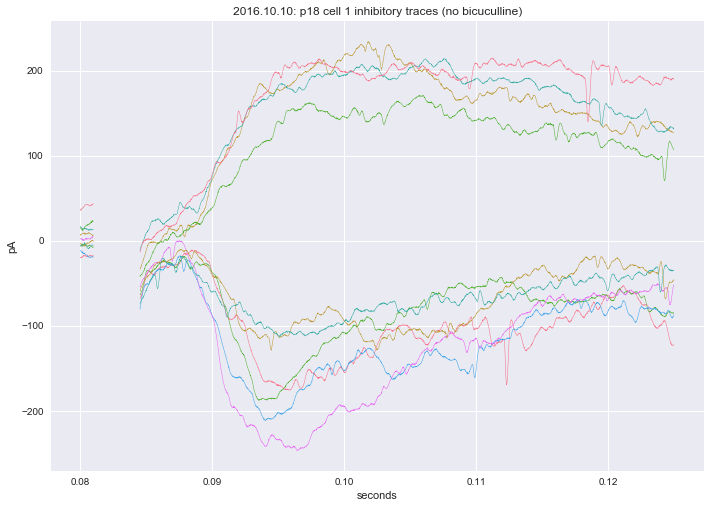

In [8]:
#files
file = '/Volumes/lab_data_2/2016.10.10.csv'
excel = '/Volumes/lab_data_2/2016.10.10_Cell1_mouse1.xlsx'

#cell information
date = '2016.10.10'
age = 'p18'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)

## p18 cell, mouse 2

inhibitory waves not present (bicuculline present)


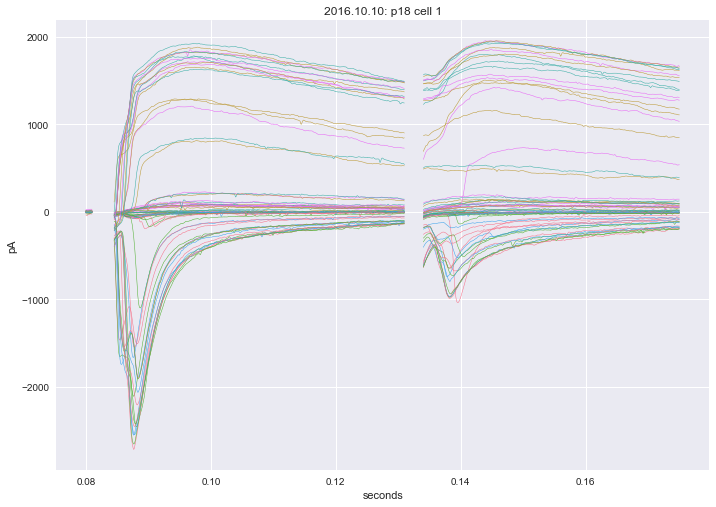

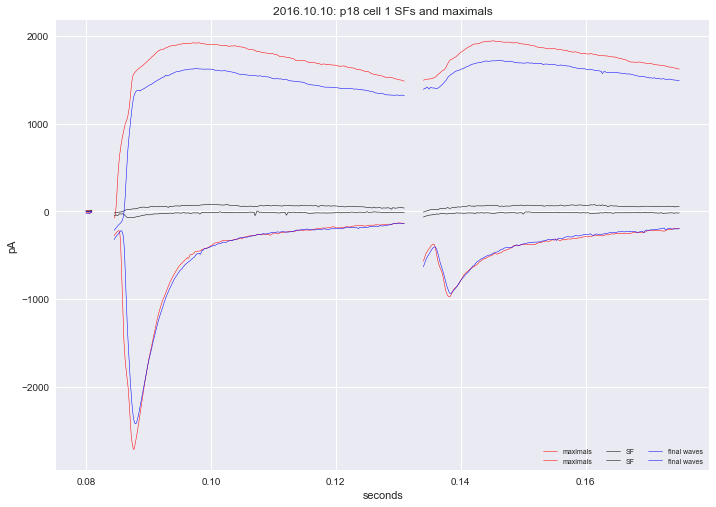

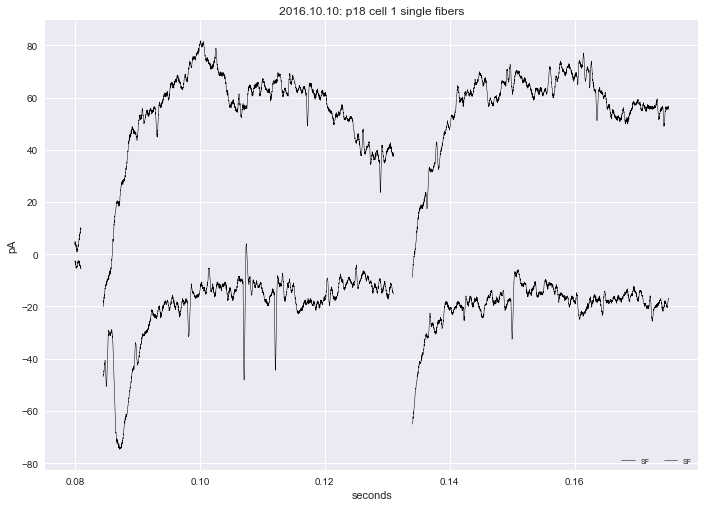

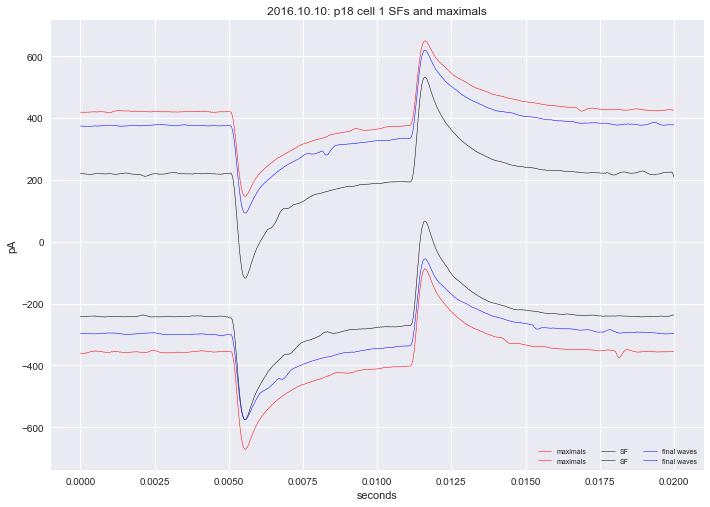

In [9]:
#files
file = '/Volumes/lab_data_2/2016.10.10.csv'
excel = '/Volumes/lab_data_2/2016.10.10_Cell1_mouse2.xlsx'

#cell information
date = '2016.10.10'
age = 'p18'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)

## p17 cell

no final maximals
no final maximals


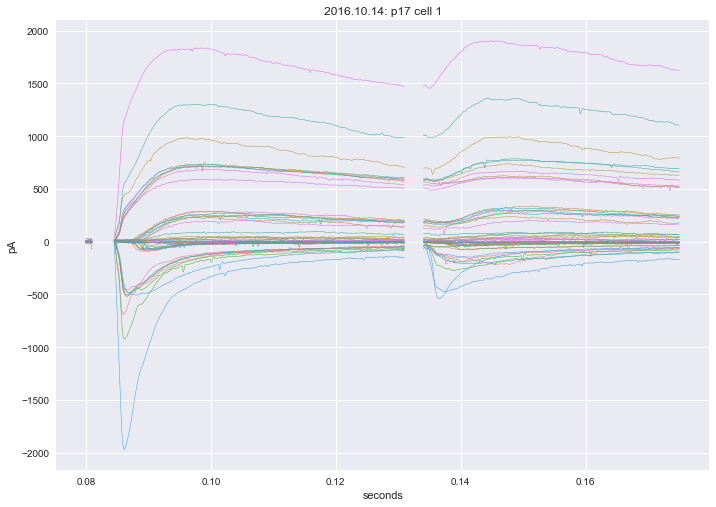

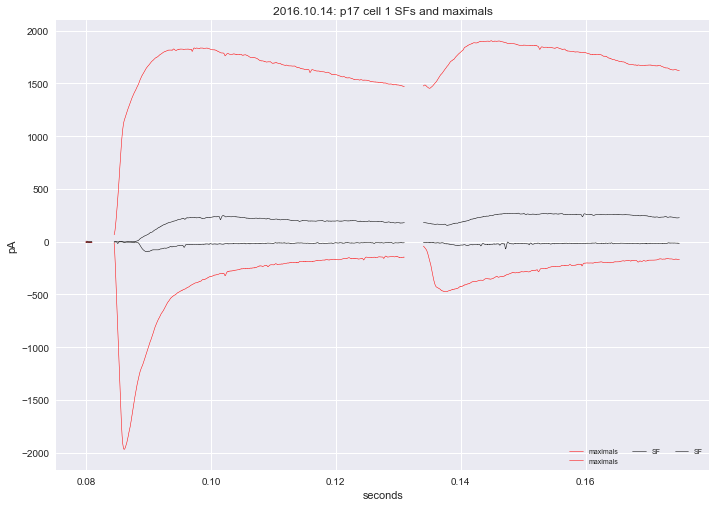

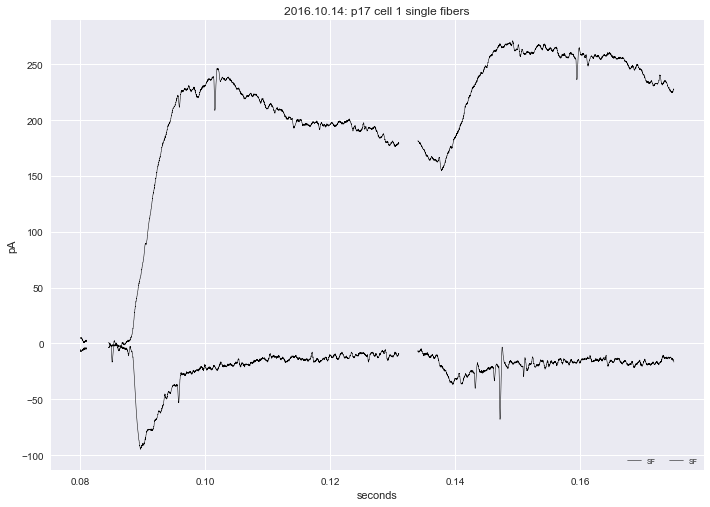

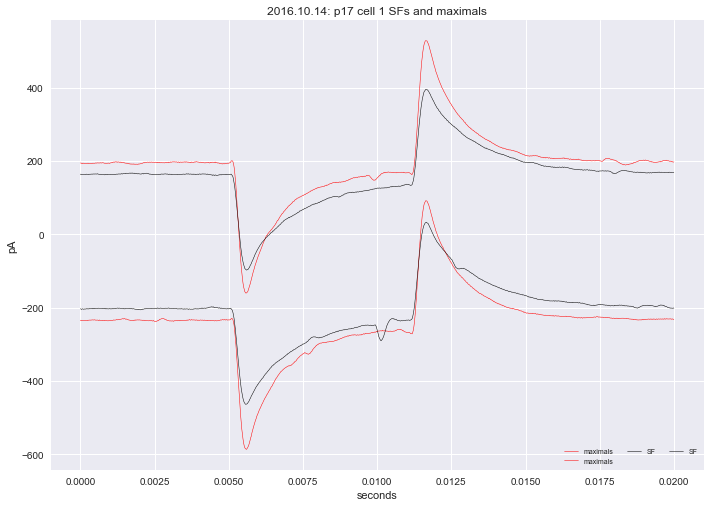

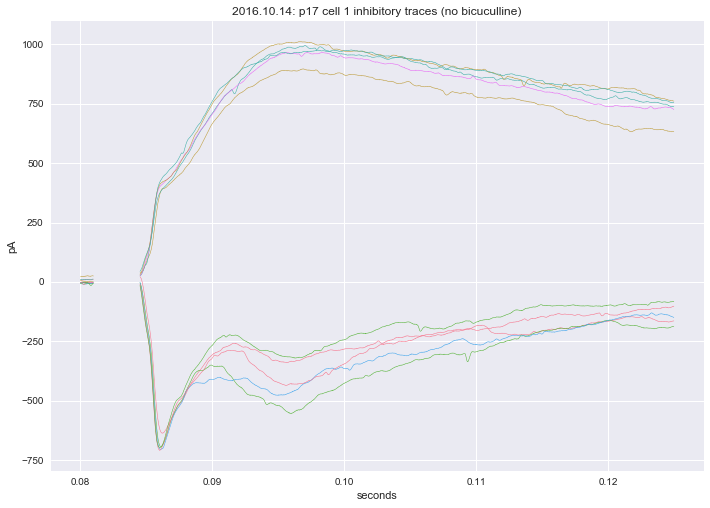

In [10]:
#files
file = '/Volumes/lab_data_2/2016.10.14.csv'
excel = '/Volumes/lab_data_2/2016.10.14_Cell1.xlsx'

#cell information
date = '2016.10.14'
age = 'p17'
cell_num = 1

plot_full_experiment(file, excel, date, age, cell_num)